In [7]:
import pandas as pd
import seaborn as sns
import scipy.stats as st

## Assignment 11

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Body mass

In [41]:
penguins.body_mass_g.groupby(penguins.species).mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

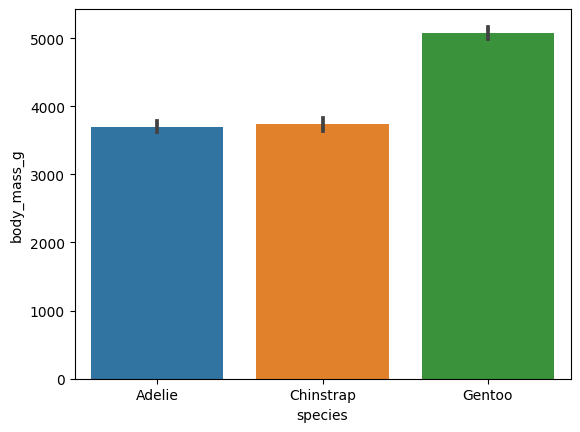

In [24]:
sns.barplot(y="body_mass_g", x="species", data=penguins)

Op basis van de mediaan en de confidence interval is er te zien dat er subtiel verband is tussen het gewicht van de penguin en de soort. De Adelie en Chinstrap hebben een mediaan die dicht bij elkaar liggen, dit betekent dat betreft deze soorten er geen significant verband is tussen het gewicht en deze soorten. Echter heeft de gentoo soort wel een verband met het gewicht van een penguin. De Gentoo penguin is namelijk gemiddeld een stuk zwaarder dan de andere twee soorten.

### Bill length

In [42]:
penguins.bill_length_mm.groupby(penguins.species).mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

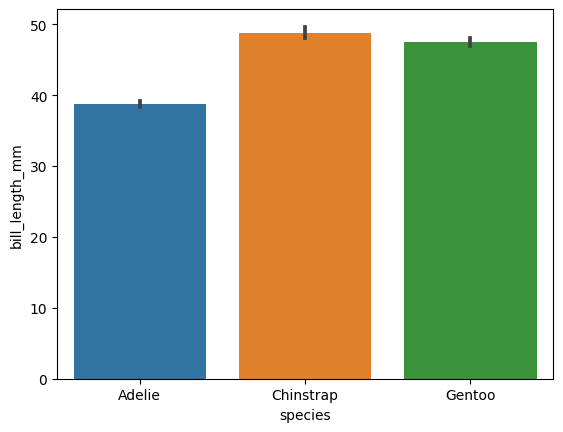

In [28]:
sns.barplot(y="bill_length_mm", x="species", data=penguins)

Het is moeilijk te zien of de confidence interval van chinstrap en gentoo overlappen omdat ze dicht bij elkaar liggen. Om dit beter te bekijken wordt de confidence interval berekent en naar de uiterste waardes gekeken. 

In [37]:
confidence = 0.95
species1 = penguins['species'] == 'Chinstrap'
penguinsSpecies = penguins[species1]
penguinsBillLength = penguinsSpecies.bill_length_mm.dropna()
st.t.interval(confidence, len(penguinsBillLength)-1, loc=penguinsBillLength.mean(), scale=st.sem(penguinsBillLength))

(48.02555140787451, 49.642095650949024)

In [38]:
confidence = 0.95
species1 = penguins['species'] == 'Gentoo'
penguinsSpecies = penguins[species1]
penguinsBillLength = penguinsSpecies.bill_length_mm.dropna()
st.t.interval(confidence, len(penguinsBillLength)-1, loc=penguinsBillLength.mean(), scale=st.sem(penguinsBillLength))

(46.954783427502186, 48.05497267005878)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Bill depth

In [43]:
penguins.bill_depth_mm.groupby(penguins.species).mean()

species
Adelie       18.346358
Chinstrap    18.420588
Gentoo       14.982114
Name: bill_depth_mm, dtype: float64

<AxesSubplot: xlabel='species', ylabel='bill_depth_mm'>

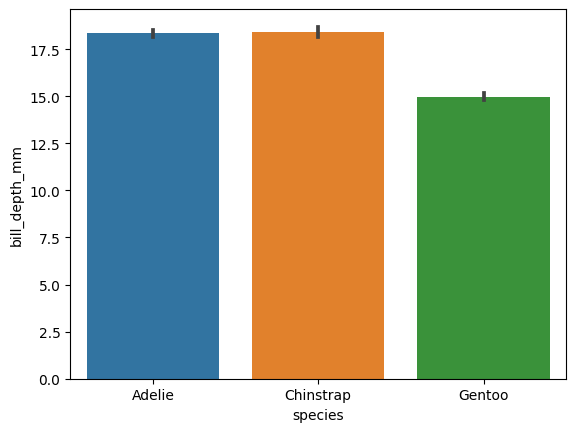

In [29]:
sns.barplot(y="bill_depth_mm", x="species", data=penguins)

Er is geen verband tussen de diepte van de snavel en de soort van de penguin. Dit geldt voor de soorten Adelie en Chinstrap. Echter de gemiddelde snaveldiepte van de soort Gentoo is erg laag in vergelijking tot de andere soorten. Dit betekent dat er wel een verband is tussen de soort Gentoo en de snaveldiepte. Als een penguin van de soort Gentoo is heeft het een minder diepe snavel dan als het van een andere soort is.

### Flipper length

In [44]:
penguins.flipper_length_mm.groupby(penguins.species).mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

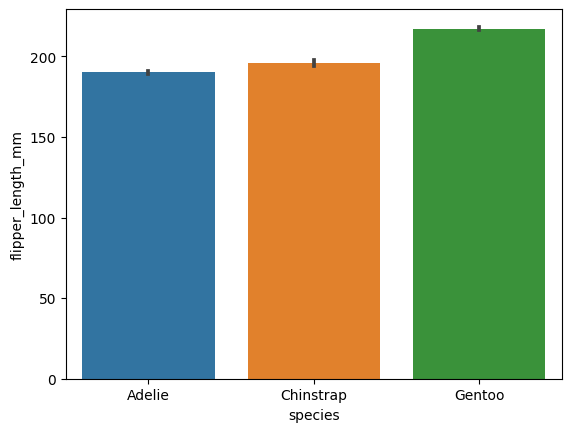

In [32]:
sns.barplot(y="flipper_length_mm", x="species", data=penguins)

Het is moeilijk te zien of de confidence interval van adelie en chinstrap overlapt omdat ze dicht bij elkaar liggen. Om dit beter te bekijken wordt de confidence interval berekent en naar de uiterste waardes gekeken. 

In [36]:
confidence = 0.95
species1 = penguins['species'] == 'Adelie'
penguinsSpecies = penguins[species1]
penguinsFlipperLength = penguinsSpecies.flipper_length_mm.dropna()
st.t.interval(confidence, len(penguinsFlipperLength)-1, loc=penguinsFlipperLength.mean(), scale=st.sem(penguinsFlipperLength))

(188.9021179338864, 191.00516683432554)

In [35]:
confidence = 0.95
species2 = penguins['species'] == 'Chinstrap'
penguinsSpecies = penguins[species2]
penguinsFlipperLength = penguinsSpecies.flipper_length_mm.dropna()
st.t.interval(confidence, len(penguinsFlipperLength)-1, loc=penguinsFlipperLength.mean(), scale=st.sem(penguinsFlipperLength))

(194.097243232267, 197.5498155912624)

Omdat het gemiddelde van de flipperlengtes en de confidence interval bij de verschillende soorten niet overlapt, is er een verband te trekken tussen de soort van de penguin en de flipperlengte van deze penguin. Dit betkent dat de soort van de penguin een significante invloed heeft op de flipperlengte.

## Assignment 12